# Online Retail

## Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the dataset

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Exploratory Data Analysis

In [4]:
df.shape

(541909, 8)

### Looking for missing values 

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- we can notice that there are missing values in the description attribute and the customerID 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [8]:
df.CustomerID.value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

- we can see that there are missing values in customer IDs and customerID- 17841 is the mode (because it has the highest frequency). we can replace the missing values in the customerId attribute with this value

In [9]:
df.Description.value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

- There are  various types of descriptions, but the descriptions are repeating 

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Imputing the missing values 

- Imputing the missing values with the mode ( in both the cases i.e. in the description attribute and CustomerID attribute as well)

In [11]:
for column in df.columns:
    if df[column].isnull().any():  # Check if there are missing values
        mode_value = df[column].mode()[0]  # Get the mode of the column
        df[column].fillna(mode_value, inplace=True)

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- Missing data has been filled i.e. the missing data imputation has been done

In [13]:
df.Description.value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     3823
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [14]:
df.CustomerID.value_counts()

CustomerID
17841.0    143063
14911.0      5903
14096.0      5128
12748.0      4642
14606.0      2782
            ...  
15070.0         1
15753.0         1
17065.0         1
16881.0         1
16995.0         1
Name: count, Length: 4372, dtype: int64

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Visualisation

### Country Attribute

In [16]:
df.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


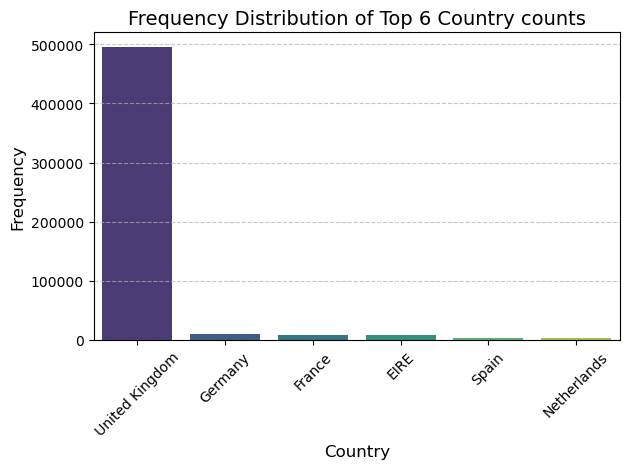

In [17]:
label_counts = df['Country'].value_counts()
label_counts_top_6= label_counts.head(6)
# Plot the frequency distribution
sns.barplot(x=label_counts_top_6.index, y=label_counts_top_6.values, palette="viridis")
plt.title('Frequency Distribution of Top 6 Country counts', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

The retail values belonging to the Country United kingdom are high in quantity or in majority 

### CustomerID Attribute

In [18]:
df.CustomerID.value_counts()

CustomerID
17841.0    143063
14911.0      5903
14096.0      5128
12748.0      4642
14606.0      2782
            ...  
15070.0         1
15753.0         1
17065.0         1
16881.0         1
16995.0         1
Name: count, Length: 4372, dtype: int64

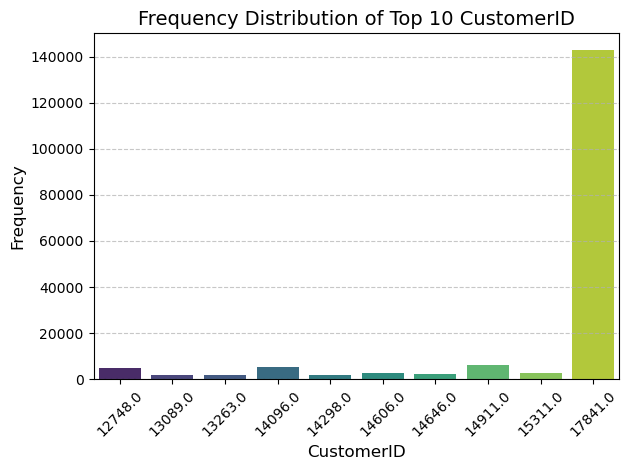

In [19]:
label_counts = df['CustomerID'].value_counts()
label_counts_top_10= label_counts.head(10)
# Plot the frequency distribution
sns.barplot(x=label_counts_top_10.index, y=label_counts_top_10.values, palette="viridis")
plt.title('Frequency Distribution of Top 10 CustomerID', fontsize=14)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

- we can observe hat CustomerID - 17841 has made the highest purchases from the dataset

### Description Attribute

In [20]:
df.Description.value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     3823
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

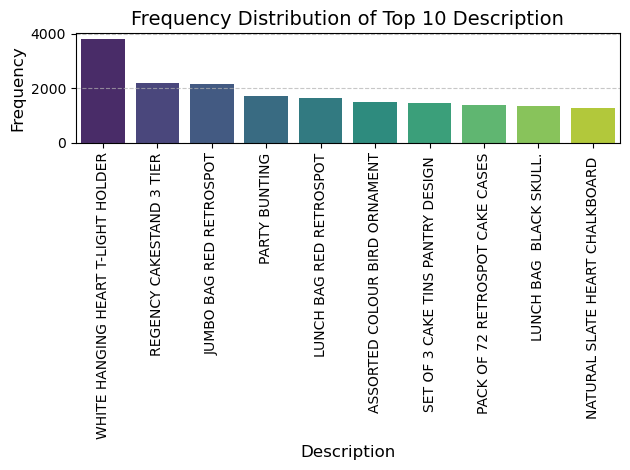

In [21]:
label_counts = df['Description'].value_counts()
label_counts_top_10= label_counts.head(10)
# Plot the frequency distribution
sns.barplot(x=label_counts_top_10.index, y=label_counts_top_10.values, palette="viridis")
plt.title('Frequency Distribution of Top 10 Description', fontsize=14)
plt.xlabel('Description', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Stockcode Attribute

In [22]:
df.StockCode.value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

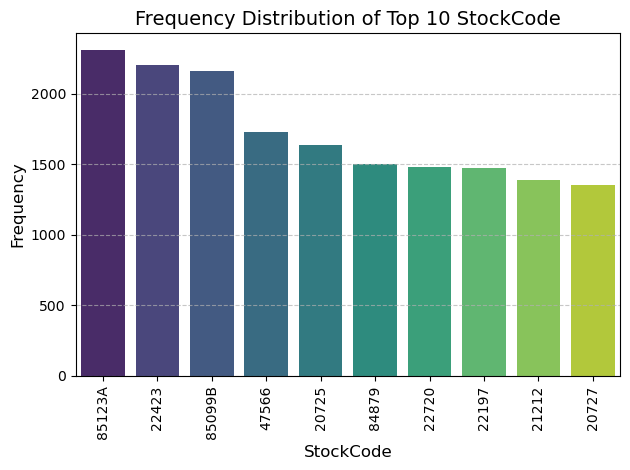

In [23]:
label_counts = df['StockCode'].value_counts()
label_counts_top_10= label_counts.head(10)
# Plot the frequency distribution
sns.barplot(x=label_counts_top_10.index, y=label_counts_top_10.values, palette="viridis")
plt.title('Frequency Distribution of Top 10 StockCode', fontsize=14)
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

- From this we can observe the stockcodes frequency of the Top 10 in the dataset and stockcode 85123A has the highest count

### Quantity Attribute

In [24]:
df.Quantity.value_counts()

Quantity
 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: count, Length: 722, dtype: int64

- we can notice that there are negative values in the Quantity attribute which is considered as noise and it should be removed

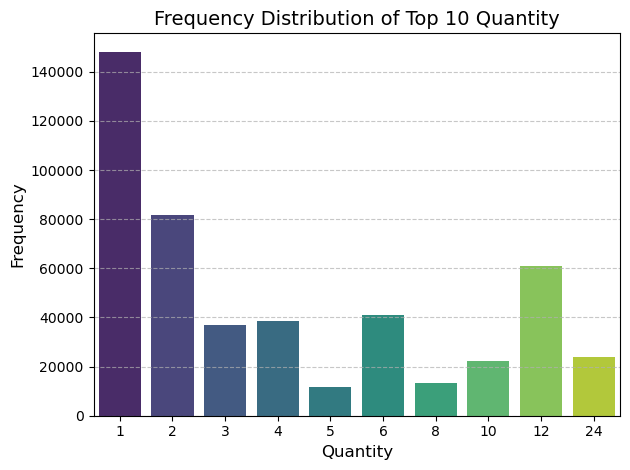

In [25]:
label_counts = df['Quantity'].value_counts()
label_counts_top_10= label_counts.head(10)
# Plot the frequency distribution
sns.barplot(x=label_counts_top_10.index, y=label_counts_top_10.values, palette="viridis")
plt.title('Frequency Distribution of Top 10 Quantity', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Filtering the Noise in the Quantity Attribute

In [27]:
df = df[df['Quantity'] >= 0]

# Print the filtered DataFrame
df.Quantity.value_counts()

Quantity
1        148227
2         81829
12        61063
6         40868
4         38484
          ...  
828           1
512           1
3100          1
291           1
80995         1
Name: count, Length: 393, dtype: int64

- So the noise in Quantity attribute is filtered